In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [17]:
def f_1(x):
    A_1 = np.array([[0.4, -0.3733], [0.06, 0.6]])
    b_1 = np.array([0.3533, 0.0])
    return A_1 @ x + b_1

def f_2(x):
    A_2 = np.array([[-0.8, -0.1867], [0.1371, 0.8]])
    b_2 = np.array([1.1, 0.1])
    return A_2 @ x + b_2

In [19]:
N = 10000
w = np.array([0.2993, 0.7007])
i_n = np.random.choice([f_1, f_2], N, p = w)
x = np.zeros((N, 2))
for i in range(1, N):
    x[i] = i_n[i-1](x[i-1])

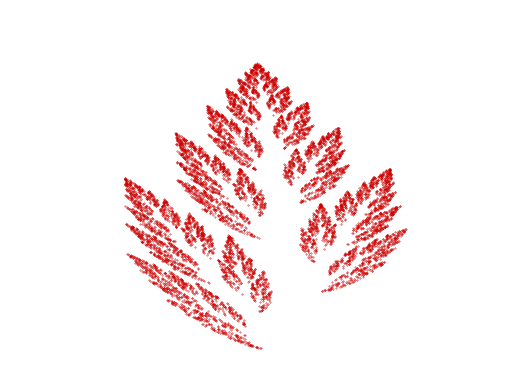

In [32]:
k = N
plt.scatter(x[20:k, 0], x[20:k, 1], s=0.1, color = [0.8, 0, 0])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().set_xlim(0, 1.05)
plt.gca().set_ylim(0, 1)
plt.show()

In [78]:
q_sigma = 0.5

def p_bar(x, y):
    return np.exp(-x**2/10 - y**4/10 - 2*(y - x**2)**2)

def log_p_bar(x, y):
    return -x**2/10 - y**4/10 - 2*(y - x**2)**2


def log_q(x_dash, y_dash, x, y):
    return np.log(1/2*np.pi*q_sigma) - q_sigma*(x_dash - x)**2/2 - q_sigma*(y_dash - y)**2/2

def log_acceptance_ratio_MH(x_dash, y_dash, x, y):
    return log_p_bar(x_dash, y_dash) - log_p_bar(x, y)

N = 10000
rng = np.random.default_rng(64)
x_n, y_n = 0, 0
samples_RW = np.zeros((2, N))
for i in range(1, N):
    x_dash, y_dash = np.random.normal(x_n, q_sigma), np.random.normal(y_n, q_sigma)
    u = np.random.uniform(0, 1, N)
    log_u = np.log(u)
    if log_u[i] < log_acceptance_ratio_MH(x_dash, y_dash, x_n, y_n):
        samples_RW[:, i] = np.array([x_dash, y_dash])
        x_n, y_n = x_dash, y_dash
    else:
        samples_RW[:, i] = np.array([x_n, y_n])

In [79]:
samples_Langevin = np.zeros((2, N))

def log_acceptance_ratio_langevin(x_dash, y_dash, x, y):
    return log_p_bar(x_dash, y_dash) - log_p_bar(x, y)

def langevin_mu(x, y):
    gamma = 0.1
    return x + gamma*(-x**2/5 - 8*x*y - 8*x**3), y + gamma*(-2*y**3/5 - 4*y + 4*x**2)


for i in range(1, N):
    x_mu, y_mu = langevin_mu(x_n, y_n)
    x_dash, y_dash = np.random.normal(x_mu, 2), np.random.normal(y_mu, 2)
    u = np.random.uniform(0, 1, N)
    log_u = np.log(u)
    if log_u[i] < log_acceptance_ratio_langevin(x_dash, y_dash, x_n, y_n):
        samples_Langevin[:, i] = np.array([x_dash, y_dash])
        x_n, y_n = x_dash, y_dash
    else:
        samples_Langevin[:, i] = np.array([x_n, y_n])

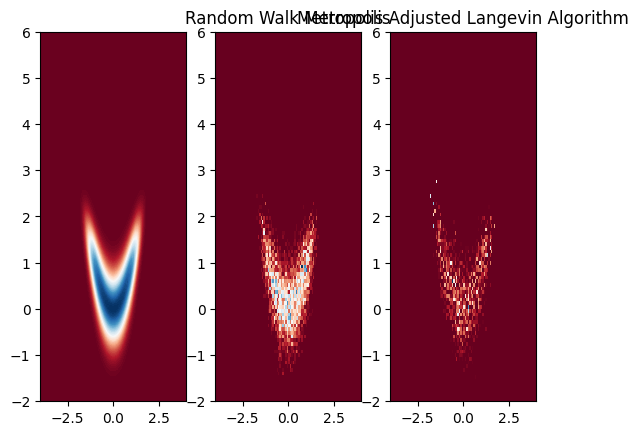

In [80]:
burnin = 20
x_bb = np.linspace(-4, 4, 100)
y_bb = np.linspace(-2, 6, 100)
X_bb , Y_bb = np.meshgrid(x_bb , y_bb)
Z_bb = np.exp(log_p_bar(X_bb , Y_bb)) # your banana function
plt.subplot(1, 3, 1)
plt.contourf(X_bb , Y_bb , Z_bb , 100 , cmap='RdBu')
plt.subplot(1, 3, 2)
plt.hist2d( samples_RW[0, burnin:N], samples_RW[1, burnin:N], 100 , cmap='RdBu', range=[[-4, 4], [-2, 6]],
density=True)
plt.title('Random Walk Metropolis')
plt.subplot(1, 3, 3)
plt.hist2d( samples_Langevin[0, burnin:N], samples_Langevin[1, burnin:N], 100 , cmap='RdBu', range=[[-4, 4], [-2, 6]], density=True)
plt.title('Metropolis Adjusted Langevin Algorithm')
plt.show ()